#### 1. Построение решающего дерева.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report, roc_curve, auc
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

In [2]:
df_1 = pd.read_excel('Nonlin_ker_1.xlsx', sheet_name='Лист23')
X_1 = df_1.iloc[:, :2]
y_1 = df_1.iloc[:, 2]

num_features = X_1.shape[1]
feature_cols = [f"Feature_{i}" for i in [-1, 1]]

In [3]:
X_train, X_test, y_train, y_test = train_test_split (X_1, y_1, test_size=0.2, random_state=42)

In [4]:
# Преобразование X_train и X_test в массивы NumPy
X_train = X_train.values if isinstance(X_train, pd.Series) else X_train.to_numpy()
X_test = X_test.values if isinstance(X_test, pd.Series) else X_test.to_numpy()

# Преобразование y_train и y_test в массивы NumPy
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train.to_numpy()
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test.to_numpy()

In [5]:
# Создание и обучение модели решающего дерева
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

# Предсказание классов для тестовых данных
y_pred = model.predict(X_test)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy on training set: 1.000
Accuracy on test set: 0.967
Precision: 0.9091
Recall: 1.0000
F1 Score: 0.9524
Confusion Matrix:
[[19  1]
 [ 0 10]]


Тестирование.

In [6]:
# Определение сетки параметров для подбора
param_grid = {
    'max_depth': [3, 5, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Поиск оптимальных параметров через кросс-валидацию
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Вывод оптимальных параметров
print("Optimal parameters:", grid_search.best_params_)

Optimal parameters: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [7]:
# Создание и обучение модели решающего дерева
best_model = tree.DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], 
                                         min_samples_split=grid_search.best_params_['min_samples_split'], 
                                         min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
best_model.fit(X_train, y_train)

# Предсказание классов для тестовых данных
y_pred = best_model.predict(X_test)

print("Accuracy on training set: {:.3f}".format(best_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model.score(X_test, y_test)))
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy on training set: 0.992
Accuracy on test set: 0.933
Precision: 0.8333
Recall: 1.0000
F1 Score: 0.9091
Confusion Matrix:
[[18  2]
 [ 0 10]]


In [8]:
dot_data = StringIO( )
export_graphviz (model, out_file = dot_data, filled = True, rounded = True, 
                 special_characters = True, feature_names= feature_cols, class_names = ['-1', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('model.png')

True

In [9]:
dot_data = StringIO( )
export_graphviz (best_model, out_file = dot_data, filled = True, rounded = True, 
                 special_characters = True, feature_names= feature_cols, class_names = ['-1', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('best_model.png')


True

#### 2. Случайный лес.

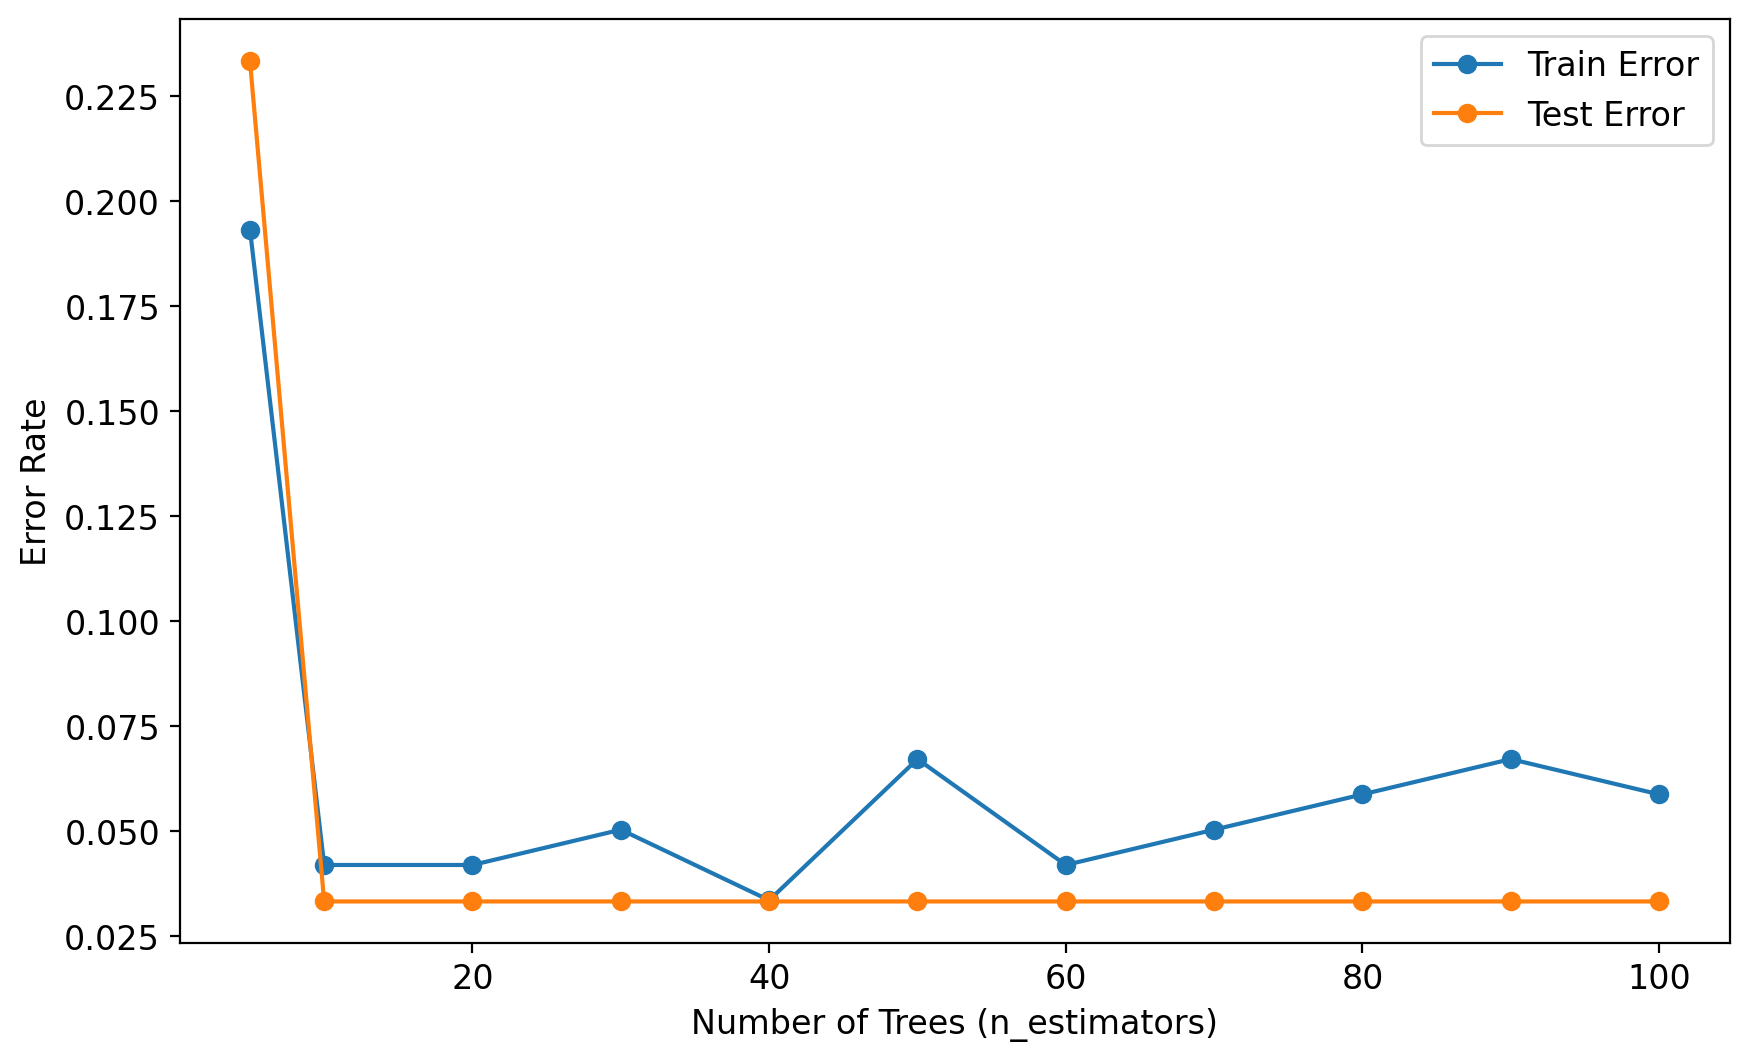

In [16]:
# Задание параметров случайного леса
max_depth = 2
n_estimators_range = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train_errors = []
test_errors = []

# Построение случайных лесов с разным числом деревьев
for n_estimators in n_estimators_range:
    # Создание модели RandomForestClassifier
    rf_classifier = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
    
    # Обучение модели
    rf_classifier.fit(X_train, y_train)
    
    # Получение предсказаний на тренировочной и тестовой выборках
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Расчет ошибок и добавление в списки
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Построение графика зависимости ошибок от числа деревьев
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors, label='Train Error', marker='o')
plt.plot(n_estimators_range, test_errors, label='Test Error', marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

#### 3. Градиентный бустинг (GBM).

А) AdaBoostClassifier

In [17]:
max_depth = 2

ada_classifier = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth = 2))

param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search_ada = GridSearchCV(ada_classifier, param_grid, cv=5)
grid_search_ada.fit(X_train, y_train)
print("Opimal parameters:", grid_search_ada.best_params_)


Opimal parameters: {'learning_rate': 1.0, 'n_estimators': 10}


In [18]:
ada_boost_classifier = AdaBoostClassifier(estimator = tree.DecisionTreeClassifier(max_depth = 2),
                                          n_estimators = grid_search_ada.best_params_['n_estimators'],
                                          learning_rate = grid_search_ada.best_params_['learning_rate'])
ada_boost_classifier.fit(X_train, y_train)

y_pred_ada_boost = ada_boost_classifier.predict(X_test)

print("Accuracy on training set: {:.3f}".format(ada_boost_classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_boost_classifier.score(X_test, y_test)))
print(f"Precision: {precision_score(y_test, y_pred_ada_boost):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ada_boost):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_ada_boost):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada_boost))

Accuracy on training set: 1.000
Accuracy on test set: 0.967
Precision: 0.9091
Recall: 1.0000
F1 Score: 0.9524
Confusion Matrix:
[[19  1]
 [ 0 10]]


Б) GradientBosstingClassifier

In [21]:
max_depth = 2

gradient_classifier = GradientBoostingClassifier()

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Perform grid search with cross-validation
grid_search_gradient_boost = GridSearchCV(gradient_classifier, param_grid, cv=5)
grid_search_gradient_boost.fit(X_train, y_train)

# Display the optimal parameters
print("Optimal parameters:", grid_search_gradient_boost.best_params_)
print(grid_search_gradient_boost.cv_results_['params'])  # Параметры для каждой модели
print(grid_search_gradient_boost.cv_results_['mean_test_score'])  # Среднее значение F-меры на тестовых данных
print(grid_search_gradient_boost.cv_results_['rank_test_score'])  # Ранг (позиция) каждой комбинации параметров

Optimal parameters: {'learning_rate': 1.0, 'n_estimators': 30}
[{'learning_rate': 0.01, 'n_estimators': 10}, {'learning_rate': 0.01, 'n_estimators': 20}, {'learning_rate': 0.01, 'n_estimators': 30}, {'learning_rate': 0.1, 'n_estimators': 10}, {'learning_rate': 0.1, 'n_estimators': 20}, {'learning_rate': 0.1, 'n_estimators': 30}, {'learning_rate': 1.0, 'n_estimators': 10}, {'learning_rate': 1.0, 'n_estimators': 20}, {'learning_rate': 1.0, 'n_estimators': 30}]
[0.72282609 0.72282609 0.72282609 0.95833333 0.96666667 0.975
 0.95       0.96666667 0.98333333]
[7 7 7 5 3 2 6 3 1]


In [20]:
gradient_boost_classifier = GradientBoostingClassifier(max_depth = max_depth,
                                          n_estimators = grid_search_gradient_boost.best_params_['n_estimators'],
                                          learning_rate = grid_search_gradient_boost.best_params_['learning_rate'])
gradient_boost_classifier.fit(X_train, y_train)

y_pred_gradient_boost = gradient_boost_classifier.predict(X_test)

print("Accuracy on training set: {:.3f}".format(gradient_boost_classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gradient_boost_classifier.score(X_test, y_test)))
print(f"Precision: {precision_score(y_test, y_pred_gradient_boost):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gradient_boost):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gradient_boost):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gradient_boost))

Accuracy on training set: 1.000
Accuracy on test set: 0.933
Precision: 0.8333
Recall: 1.0000
F1 Score: 0.9091
Confusion Matrix:
[[18  2]
 [ 0 10]]


В) Выводы о возможном переобучении могут быть сделаны на основе разницы в качестве модели на тренировочной и тестовой выборках. Если качество на тренировочной выборке существенно выше, чем на тестовой, это может свидетельствовать о переобучении.Выводы о возможном переобучении могут быть сделаны на основе разницы в качестве модели на тренировочной и тестовой выборках. Если качество на тренировочной выборке существенно выше, чем на тестовой, это может свидетельствовать о переобучении. сделай это

In [15]:
# Разница в качестве моделей на тренировочной и тестовой выборках
accuracy_ada_boost = accuracy_score(y_test, y_pred_ada_boost)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boost)
accuracy_difference_ada_boost = accuracy_ada_boost - ada_boost_classifier.score(X_train, y_train)
accuracy_difference_gradient_boosting = accuracy_gradient_boosting - gradient_boost_classifier.score(X_train, y_train)

# Вывод разницы в качестве
print("Разница в Accuracy (AdaBoostClassifier):", accuracy_difference_ada_boost)
print("Разница в Accuracy (GradientBoostingClassifier):", accuracy_difference_gradient_boosting)

# Вывод об исследовании возможного переобучения
if accuracy_difference_ada_boost > 0:
    print("\nAdaBoostClassifier может быть подвержен переобучению.")
else:
    print("\nAdaBoostClassifier не показывает явных признаков переобучения.")

if accuracy_difference_gradient_boosting > 0:
    print("\nGradientBoostingClassifier может быть подвержен переобучению.")
else:
    print("\nGradientBoostingClassifier не показывает явных признаков переобучения.")

Разница в Accuracy (AdaBoostClassifier): -0.033333333333333326
Разница в Accuracy (GradientBoostingClassifier): -0.06666666666666665

AdaBoostClassifier не показывает явных признаков переобучения.

GradientBoostingClassifier не показывает явных признаков переобучения.
